# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Creates empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
       
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Norman Wells
Processing Record 2 | Villa del Rosario
Processing Record 3 | Jamestown
Processing Record 4 | Qaqortoq
Processing Record 5 | Kloulklubed
Processing Record 6 | Cape Town
Processing Record 7 | Ushuaia
Processing Record 8 | Hermanus
Processing Record 9 | Port Elizabeth
Processing Record 10 | Rikitea
Processing Record 11 | Sheridan
Processing Record 12 | Puerto Lempira
Processing Record 13 | Novopavlovka
Processing Record 14 | East London
City not found. Skipping...
Processing Record 15 | Charlestown
Processing Record 16 | Livingston
Processing Record 17 | Mataura
Processing Record 18 | Atuona
Processing Record 19 | São João da Barra
Processing Record 20 | Saint Paul Harbor
City not found. Skipping...
Processing Record 21 | Shitanjing
Processing Record 22 | Arrondissement de Lannion
Processing Record 23 | Gwanda
City not found. Skipping...
Processing Record 24 | Lodja
Processing Record 25 | Aykhal
P

Processing Record 231 | San Andrés
Processing Record 232 | Torbay
Processing Record 233 | Geraldton
Processing Record 234 | George Town
Processing Record 235 | Tommot
Processing Record 236 | Airai
Processing Record 237 | Nassau
Processing Record 238 | Broome
Processing Record 239 | Saint George
Processing Record 240 | Sitka
Processing Record 241 | Valera
Processing Record 242 | Dingle
Processing Record 243 | Comodoro Rivadavia
Processing Record 244 | Bassar
Processing Record 245 | Macapá
Processing Record 246 | Paracuru
Processing Record 247 | Souillac
Processing Record 248 | Ambilobe
Processing Record 249 | Henties Bay
Processing Record 250 | Yangi Marg`ilon
Processing Record 251 | Codrington
Processing Record 252 | Ulladulla
City not found. Skipping...
City not found. Skipping...
Processing Record 253 | Narsaq
Processing Record 254 | Port Shepstone
Processing Record 255 | Seymchan
Processing Record 256 | Otjimbingwe
City not found. Skipping...
Processing Record 257 | Greymouth
City n

Processing Record 456 | Kralendijk
Processing Record 457 | Atar
Processing Record 458 | Kharan
Processing Record 459 | Dolni Dabnik
Processing Record 460 | Camacha
Processing Record 461 | Jiaozuo
Processing Record 462 | Kalvarija
Processing Record 463 | Sivas Province
Processing Record 464 | Amapá
Processing Record 465 | Southbridge
Processing Record 466 | Gainesville
Processing Record 467 | Tinde
Processing Record 468 | Kulhudhuffushi
Processing Record 469 | Bonnyville
Processing Record 470 | Bereda
Processing Record 471 | Jardim
Processing Record 472 | Wajir
Processing Record 473 | Aklavik
Processing Record 474 | San Lorenzo
Processing Record 475 | Kovdor
Processing Record 476 | Morant Bay
Processing Record 477 | Rūdsar
Processing Record 478 | Skellefteå
Processing Record 479 | Sakakah
Processing Record 480 | Linkou
Processing Record 481 | Beian
Processing Record 482 | Kutum
Processing Record 483 | Griffith
Processing Record 484 | Bagdarin
Processing Record 485 | Tayu
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
new_cities = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(new_cities)

# Display count of weather data values 
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [5]:
#makes it easier to see
weather_data['Max Temp'] = weather_data['Max Temp'].replace('', np.nan)

weather_data = weather_data.dropna()

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norman Wells,20,CA,1589151028,59,65.28,-126.83,55.40,14.99
1,Villa del Rosario,20,CO,1589151029,49,7.83,-72.47,93.20,9.17
2,Jamestown,90,US,1589151030,53,42.10,-79.24,53.01,14.99
3,Qaqortoq,58,GL,1589151031,57,60.72,-46.03,48.20,12.75
4,Kloulklubed,75,PW,1589151032,94,7.04,134.26,77.00,3.36


In [6]:
weather_data.to_csv("cities_weather_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

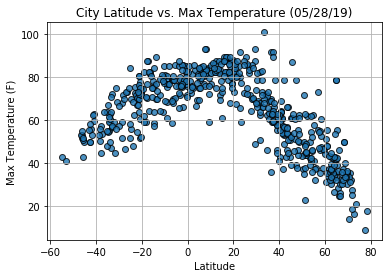

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("01_MaxTemp_Latitude.png")

# Show plot
plt.show()


This scatterplot shows the relationship between latitude and max temp. The southern latitudes (<0) currently have higher max temps on average than the northern latitudes (>0).

#### Latitude vs. Humidity Plot

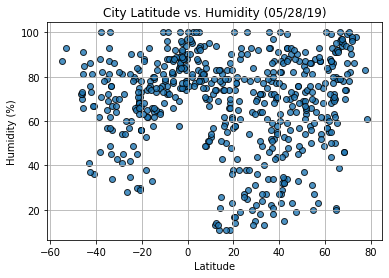

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("02_Humidity_Latitude.png")

# Show plot
plt.show()

This scatterplot is looking at the relationship between latitude and humidity. Majority above the datapoints were above 50%.

#### Latitude vs. Cloudiness Plot

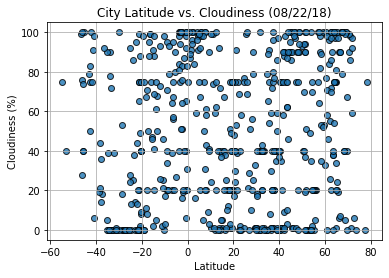

In [9]:

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("03_Cloudiness_Latitude.png")

# Show plot
plt.show()

This scatterplot displays the relationship between latitude and cloudiness. There are plenty of clusters at 0%, 20%, 40%, 75%, 90% (in the norhtern latitudes) and 100%.

#### Latitude vs. Wind Speed Plot

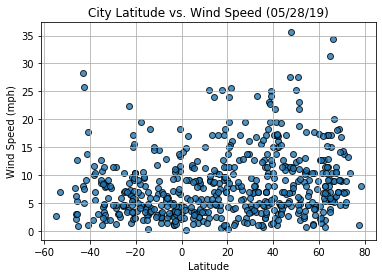

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("04_Windspeed_Latitude.png")

# Show plot
plt.show()


This scatterplot shows the relationship between latitude and wind speed. It looks like the average wind speed is below 15 MPH.

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere DataFrames
north_r = weather_data.loc[weather_data["Lat"] >= 0, :]
north_r.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norman Wells,20,CA,1589151028,59,65.28,-126.83,55.40,14.99
1,Villa del Rosario,20,CO,1589151029,49,7.83,-72.47,93.20,9.17
2,Jamestown,90,US,1589151030,53,42.10,-79.24,53.01,14.99
3,Qaqortoq,58,GL,1589151031,57,60.72,-46.03,48.20,12.75
4,Kloulklubed,75,PW,1589151032,94,7.04,134.26,77.00,3.36


In [12]:
#Southern Hemisphere DataFrames

cercy = weather_data.loc[weather_data["Lat"] <= 0, :]
cercy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,Cape Town,90,ZA,1589150912,100,-33.93,18.42,63.00,4.70
6,Ushuaia,75,AR,1589150909,87,-54.80,-68.30,42.80,2.75
7,Hermanus,0,ZA,1589151036,93,-34.42,19.23,55.00,4.21
8,Port Elizabeth,0,ZA,1589151037,62,-33.92,25.57,59.00,3.36
9,Rikitea,14,PF,1589151038,79,-23.12,-134.97,75.36,8.52


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

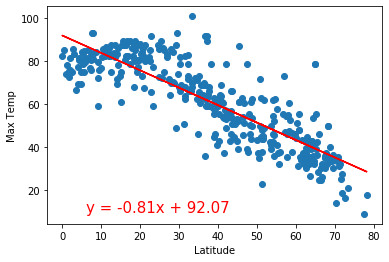

In [13]:
#defines variables
x_values = north_r['Lat']
y_values = north_r['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

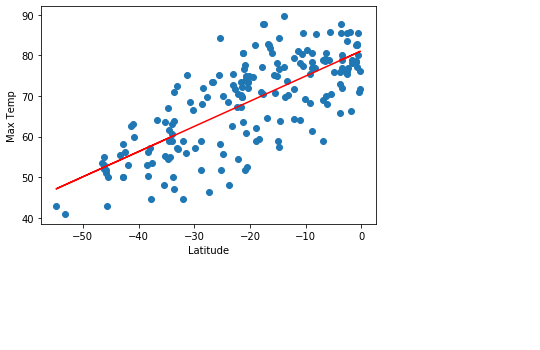

In [14]:
x_values = cercy['Lat']
y_values = cercy['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

Max Temp vs. Latitude Analysis

There is a very strong negative correlation between Max. Temp and Latitude in the northern hemisphere but a moderate positive correlation in the southern hemispere.
A positive relationship means there is a stronger association between both variables.
A negative, or inverse, relationship means that larger scores on one variable are associated with smaller scores on the other variable.
From the results, the equator has the warmest temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

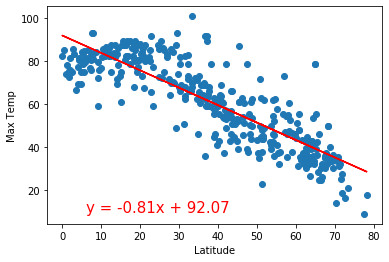

In [15]:
x_values = north_r['Lat']
y_values = north_r['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

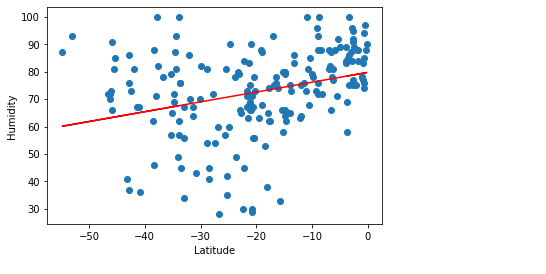

In [16]:
x_values = cercy['Lat']
y_values = cercy['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

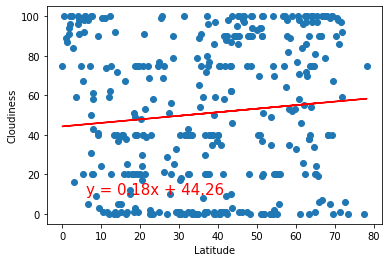

In [17]:
x_values = north_r['Lat']
y_values = north_r['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

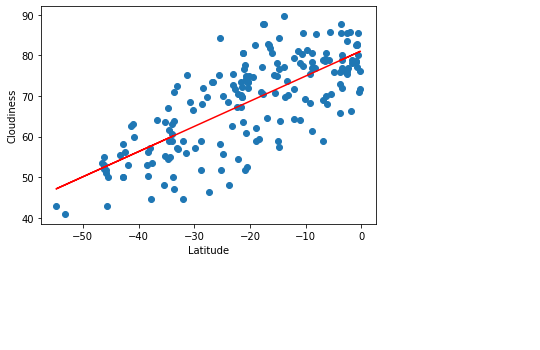

In [18]:

x_values = cercy['Lat']
y_values = cercy['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

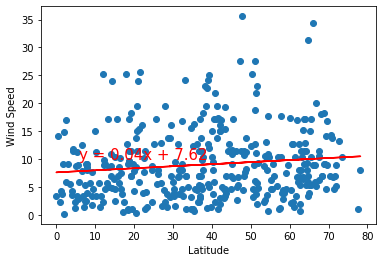

In [19]:

x_values = north_r['Lat']
y_values = north_r['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

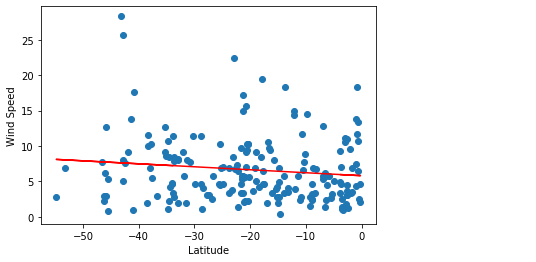

In [20]:
x_values = cercy['Lat']
y_values = cercy['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()